In [1]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the dataset
#mnist datasets contains handwritten digits 0 to 9 
#10,000 samples testing and 60,000 samples for training
data = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = data.load_data()

In [3]:
#Checking the shape of data
# x -> contains the images  and y-> contains their corresponding integer value
x_test.shape

(10000, 28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
#converting all the values of x -> between 0 and 1 divide by 255 (rgb color model)
x_train, x_test = x_train/255, x_test/255

In [7]:
#Now for model import Sequential model and layers -> Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [8]:
#Now create the model
model = Sequential([
    Flatten(input_shape=(28,28)), #defining input image must be of 28*28 dimension (Input Layer)
    Dense(150,activation='relu'), #defining the fully connected 150 neurons with activation = relu (Hidden Layer) 
    Dense(10,activation='softmax') 
    #defining the fully connected 10 neurons with activation = softmax to classify the output into desired classes (0 to 9) (Output Layer)
])

In [9]:
#First compile the model and then fit the model
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6386 - accuracy: 0.8388
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3375 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2904 - accuracy: 0.9187
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2607 - accuracy: 0.9275
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2378 - accuracy: 0.9336


In [11]:
#Evaluating the model
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2245 - accuracy: 0.9351


[0.2245485633611679, 0.9351000189781189]

313/313 [==============================] - 1s 4ms/step
Predicted value:  4


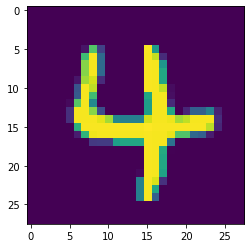

In [14]:
#classifying the input
idx = random.randint(0,len(x_test))
plt.imshow(x_test[idx])
prediction = model.predict(x_test)
print("Predicted value: ",np.argmax(prediction[idx]))